In [1]:
import os
import sys

sys.path.append(os.path.dirname(sys.path[0]))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import scripts.constants as con
from scripts.helpers import get_unique_frame
from scripts.properties.ovito_procedures import OvitoProcessor

In [4]:
CURRENT_DATA_NORMAL = '2021-09-24_prepared_1.3_normal'
PLOT_FILENAME_POSTFIX_NORMAL = 'prepared_1.3_normal'

PATH_TO_CURRENT_DATA_NORMAL = os.path.join(con.PATH_TO_DATA, CURRENT_DATA_NORMAL)
PATH_TO_CURRENT_DATA_NORMAL

'C:\\albert\\git_reps\\molecular_dynamics\\data\\2021-09-24_prepared_1.3_normal'

In [5]:
targets = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'targets_pbc.npy'))
samples = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'samples.npy'))
targets.shape, samples.shape

((2464, 1372, 3), (2464, 612))

In [6]:
i = 1
pos_1 = targets[i]
pos_2 = targets[-i]
rdf_1 = samples[i]
rdf_2 = samples[-i]

In [7]:
pos_1

array([[ 5.13129307, -4.11261401, -2.90448311],
       [ 0.12439733, -0.22185111,  2.53740871],
       [ 2.1679544 , -5.70129032,  2.38897207],
       ...,
       [-0.82196022,  4.37994546, -5.49183294],
       [-0.38693089,  0.3554578 , -4.37084224],
       [-0.40852528,  2.44431159, -4.61102135]])

In [8]:
pos_2

array([[ 5.77046259, -5.24812766, -2.35330869],
       [ 0.26348787,  0.23353462,  5.26542035],
       [ 1.55456027,  0.86504747,  0.81226249],
       ...,
       [-0.52255611,  4.06050458, -4.73555708],
       [ 6.00386276,  2.88401089,  5.16811926],
       [-2.25294797,  4.39762752, -5.60429382]])

In [9]:
cell_dimensions = np.ones(3) * 12.25
ovito_1 = OvitoProcessor(positions=pos_1, cell_dimensions=cell_dimensions)
ovito_2 = OvitoProcessor(positions=pos_2, cell_dimensions=cell_dimensions)

In [10]:
indices_1 = get_unique_frame(ovito_1.get_voronoi_indices())
indices_2 = get_unique_frame(ovito_2.get_voronoi_indices())
merged_indices = indices_1.merge(
    right=indices_2, 
    on=list(range(10)), 
    how='outer',
).fillna(0).astype(int)
merged_indices['diff'] = merged_indices['counts_y'] - merged_indices['counts_x']
merged_indices

,counts_x,0,1,2,3,4,5,6,7,8,9,counts_y,diff
0,9,0,0,1,4,4,3,1,0,0,0,8,-1
1,9,0,0,1,5,4,3,1,0,0,0,0,-9
2,8,0,0,1,3,7,1,0,0,0,0,2,-6
3,8,0,0,2,2,6,3,0,0,0,0,7,-1
4,8,0,0,1,2,7,4,0,0,0,0,3,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0,0,0,2,1,8,2,0,0,0,0,1,1
1392,0,0,0,2,1,8,2,0,1,0,0,1,1
1393,0,0,0,2,1,8,3,0,0,0,0,1,1
1394,0,0,0,2,1,8,4,2,0,0,0,1,1


In [11]:
volumes_1 = get_unique_frame(ovito_1.get_voronoi_volumes()).rename(columns={0: 'volume'})
volumes_2 = get_unique_frame(ovito_2.get_voronoi_volumes()).rename(columns={0: 'volume'})
merged_volumes = volumes_1.merge(
    right=volumes_2, 
    on='volume', 
    how='outer',
).fillna(0)
merged_volumes['diff'] = merged_volumes['counts_y'] - merged_volumes['counts_x']
merged_volumes

,counts_x,volume,counts_y,diff
0,1.0,1.001760,0.0,-1.0
1,1.0,1.383535,0.0,-1.0
2,1.0,1.385897,0.0,-1.0
3,1.0,1.385139,0.0,-1.0
4,1.0,1.385122,0.0,-1.0
...,...,...,...,...
2739,0.0,1.257746,1.0,1.0
2740,0.0,1.257507,1.0,1.0
2741,0.0,1.257494,1.0,1.0
2742,0.0,1.257116,1.0,1.0


In [12]:
coordinations_1 = get_unique_frame(ovito_1.get_voronoi_coordination()).rename(columns={0: 'coordination'})
coordinations_2 = get_unique_frame(ovito_2.get_voronoi_coordination()).rename(columns={0: 'coordination'})
merged_coordinations = coordinations_1.merge(
    right=coordinations_2, 
    on='coordination', 
    how='outer',
).fillna(0).astype(int)
merged_coordinations['diff'] = merged_coordinations['counts_y'] - merged_coordinations['counts_x']
merged_coordinations

,counts_x,coordination,counts_y,diff
0,323,14,339,16
1,311,13,322,11
2,222,15,250,28
3,205,12,176,-29
4,134,16,136,2
5,74,11,76,2
6,60,17,56,-4
7,23,18,10,-13
8,13,10,5,-8
9,3,19,2,-1


In [13]:
merged_indices = merged_indices[
    (merged_indices['counts_x'] > 1)
    & (merged_indices['counts_y'] > 1)
].reset_index(drop=True)
merged_indices

,counts_x,0,1,2,3,4,5,6,7,8,9,counts_y,diff
0,9,0,0,1,4,4,3,1,0,0,0,8,-1
1,8,0,0,1,3,7,1,0,0,0,0,2,-6
2,8,0,0,2,2,6,3,0,0,0,0,7,-1
3,8,0,0,1,2,7,4,0,0,0,0,3,-5
4,8,0,0,1,3,5,3,0,0,0,0,4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,0,0,2,3,5,2,1,0,0,0,5,3
104,2,0,0,1,2,5,4,0,0,0,0,3,1
105,2,0,0,2,3,8,1,0,0,0,0,2,0
106,2,0,0,2,3,6,4,0,0,0,0,2,0


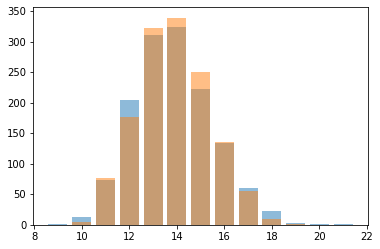

In [14]:
plt.bar(merged_coordinations['coordination'], merged_coordinations['counts_x'], alpha=0.5)
plt.bar(merged_coordinations['coordination'], merged_coordinations['counts_y'], alpha=0.5)
plt.show()

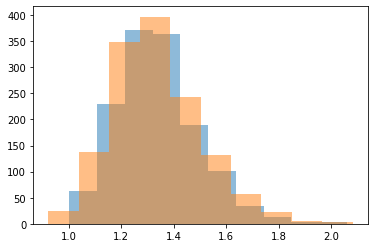

In [15]:
plt.hist(volumes_1['volume'], alpha=0.5)
plt.hist(volumes_2['volume'], alpha=0.5)
plt.show()

In [16]:
radii, ovito_rdf_1, coordination = ovito_1.get_rdf(is_coordination_returned=True)

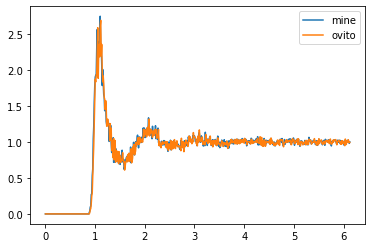

In [17]:
plt.plot(radii, rdf_1[:radii.size], label='mine')
plt.plot(radii, ovito_rdf_1[:radii.size], label='ovito')
plt.legend()
plt.show()

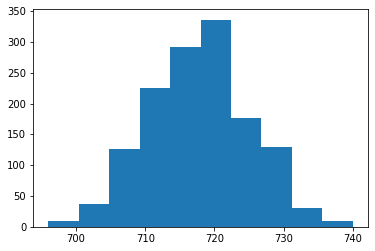

In [18]:
plt.hist(coordination)
plt.show()